In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#1. Data Wrangling

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PGC AIML/5. PGC AIML Core - Applied Data Science with Python/Assessment/1. Sales Analysis/1688639662_ausapparalsales4thqrt2020.xlsx')

In [ ]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [ ]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


####_Check for null values_

In [ ]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

####_Check for NA values_

In [ ]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

####_Check for not NA values_

In [ ]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

####_Check for duplicated records_

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


####_Check for invalid entries_

In [ ]:
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


####_Rename Columns and Formatting_

In [ ]:
# Convert object to string
df['Time'] = df['Time'].astype('string')
df['State'] = df['State'].astype('string')
df['Group'] = df['Group'].astype('string')

####_Verify all the data types_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   string        
 2   State   7560 non-null   string        
 3   Group   7560 non-null   string        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), string(3)
memory usage: 354.5 KB


In [ ]:
print('Unit: min =', df['Unit'].min(), ', max =', df['Unit'].max())
print('Sales: min =', df['Sales'].min(), ', max =', df['Sales'].max())

Unit: min = 2 , max = 65
Sales: min = 5000 , max = 162500


####_Data Normalization_

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Unit' column and add it to the DataFrame
df['normalized_Unit'] = scaler.fit_transform(df[['Unit']])

# Fit and transform the 'Sales' column and add it to the DataFrame
df['normalized_Sales'] = scaler.fit_transform(df[['Sales']])

df.describe()

,Unit,Sales,normalized_Unit,normalized_Sales
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


#2. Data Analysis

##Descriptive Analysis

In [ ]:
df.describe()

,Unit,Sales,normalized_Unit,normalized_Sales
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


In [ ]:
df['normalized_Unit'].describe()

count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: normalized_Unit, dtype: float64

In [ ]:
df['normalized_Sales'].describe()

count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: normalized_Sales, dtype: float64

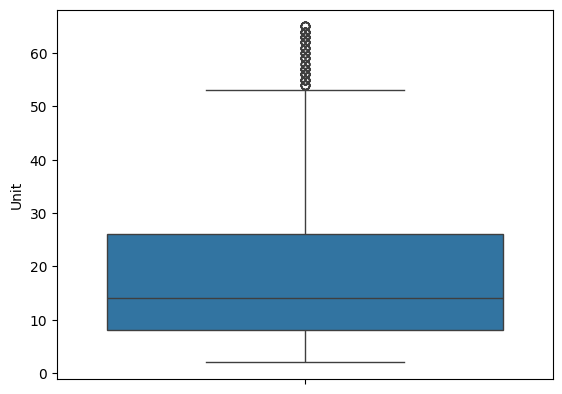

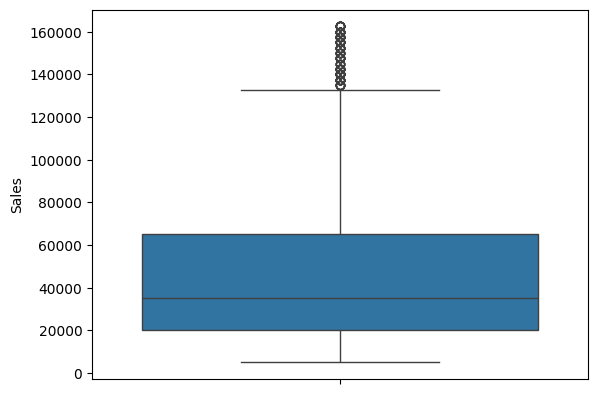

In [ ]:
sns.boxplot(df["Unit"])
plt.show()

sns.boxplot(df['Sales'])
plt.show()

_25, _75 = np.percentile(df["Unit"],[25,75])
irq = _75 - _25
unit_upper = _75 + 1.5*irq
unit_lower = _25 - 1.5*irq

_25, _75 = np.percentile(df["Sales"],[25,75])
irq = _75 - _25
sales_upper = ( _75 + 1.5*irq)
sales_lower = ( _25 - 1.5*irq)

##Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [ ]:
# Group by 'Group' and sum their sales
groupwise_sales = df.groupby('Group').Sales.sum()

groupwise_sales

Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64

In [ ]:
# Groupwise number of units sold
df.groupby('Group').Unit.sum()

Group
Kids       34029
Men        34300
Seniors    33615
Women      34177
Name: Unit, dtype: int64

In [ ]:
# Find the Groups with maximum and minimum sales
group_max_sales = groupwise_sales.idxmax()
group_min_sales = groupwise_sales.idxmin()

group_max_units_sold = df.groupby('Group').Unit.sum().max()
group_min_units_sold = df.groupby('Group').Unit.sum().min()

print('{} state is generating the highest sales with {} sold units'.format(group_max_sales, group_max_units_sold))
print('{} state is generating the lowest sales with {} sold units'.format(group_min_sales, group_min_units_sold))

 Men state is generating the highest sales with 34300 sold units
 Seniors state is generating the lowest sales with 33615 sold units


##Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [ ]:
# Group by 'Sales' and sum their sales
statewise_sales = df.groupby('State').Sales.sum()

statewise_sales

State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

In [ ]:
# Statewise number of units sold
df.groupby('State').Unit.sum()

State
NSW    29988
NT      9032
QLD    13367
SA     23543
TAS     9104
VIC    42226
WA      8861
Name: Unit, dtype: int64

In [ ]:
# Find the states with maximum and minimum sales
state_max_sales = statewise_sales.idxmax()
state_min_sales = statewise_sales.idxmin()

max_units_sold = df.groupby('State').Unit.sum().max()
min_units_sold = df.groupby('State').Unit.sum().min()

print('{} state is generating the highest sales with {} sold units'.format(state_max_sales, max_units_sold))
print('{} state is generating the lowest sales with {} sold units'.format(state_min_sales, min_units_sold))

 VIC state is generating the highest sales with 42226 sold units
 WA state is generating the lowest sales with 8861 sold units


##Generate weekly, monthly and quarterly reports for the analysis made.

In [ ]:
df.set_index('Date', inplace=True)  # Set date column as index

###Weekly Report

In [ ]:
# Weekly Report: resample by week and start with Monday
weekly_report = df.drop(columns=['normalized_Unit', 'normalized_Sales']).resample('W-MON').sum(numeric_only=True)
weekly_report

,Unit,Sales
Date,,
2020-10-05,7563,18907500
2020-10-12,10774,26935000
2020-10-19,10722,26805000
2020-10-26,10636,26590000
2020-11-02,8319,20797500
2020-11-09,8426,21065000
2020-11-16,8497,21242500
2020-11-23,8475,21187500
2020-11-30,8577,21442500


####_Weekly Sales and Units Sold_

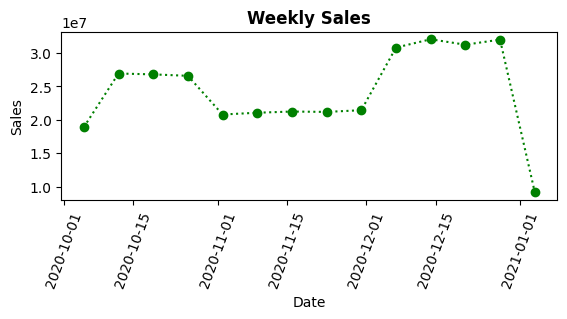

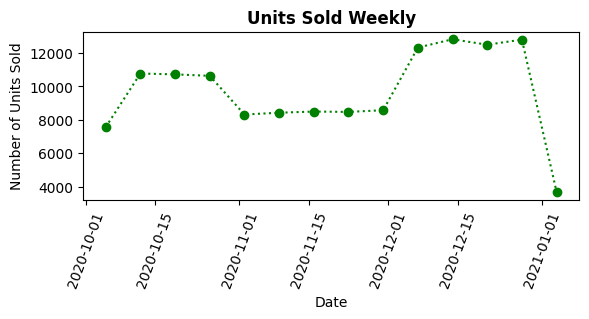

In [ ]:
plt.subplot(2, 1, 1)
plt.plot_date(weekly_report.index, weekly_report['Sales'],  linestyle='dotted', color='g')
plt.xticks(rotation=70)
plt.title('Weekly Sales', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

plt.subplot(2, 1, 2)
plt.plot_date(weekly_report.index, weekly_report['Unit'],  linestyle='dotted', color='g')
plt.xticks(rotation=70)
plt.title('Units Sold Weekly', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.show()

###Monthly Report

In [ ]:
# Monthly Report: resample by month
monthly_report = df.drop(columns=['normalized_Unit', 'normalized_Sales']).resample('M').sum(numeric_only=True)
monthly_report

,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


####_Monthly Sales and Units Sold_

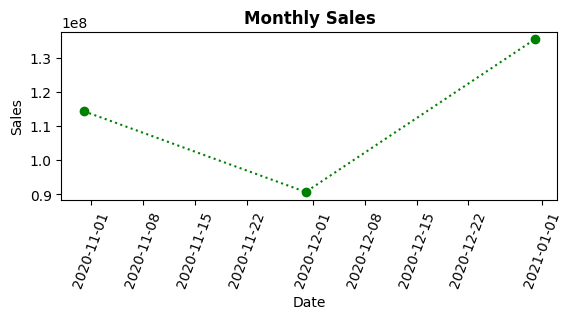

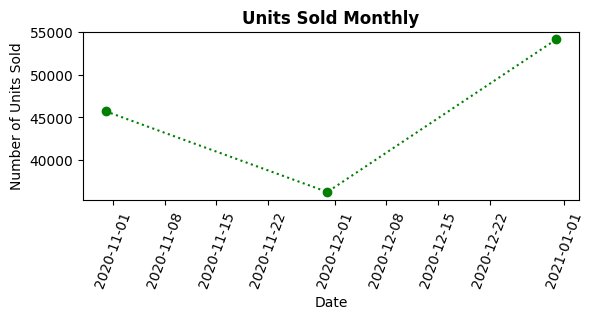

In [ ]:
plt.subplot(2, 1, 1)
plt.plot_date(monthly_report.index, monthly_report['Sales'], linestyle='dotted', color='g')
plt.xticks(rotation=70)
plt.title('Monthly Sales', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

plt.subplot(2, 1, 2)
plt.plot_date(monthly_report.index, monthly_report['Unit'],  linestyle='dotted', color='g')
plt.xticks(rotation=70)
plt.title('Units Sold Monthly', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.show()

###Quarterly Report

In [ ]:
# Monthly Report: resample by quarters (3 months)
quarterly_report = df.drop(columns=['normalized_Unit', 'normalized_Sales']).resample('Q').sum(numeric_only=True)
quarterly_report

,Unit,Sales
Date,,
2020-12-31,136121,340302500


####_Quarterly Sales and Units Sold_

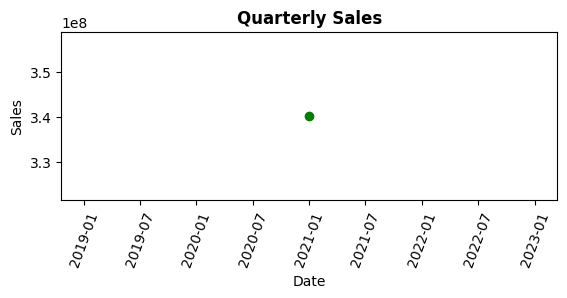

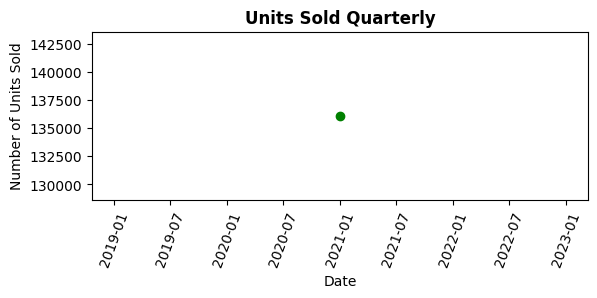

In [ ]:
plt.subplot(2, 1, 1)
plt.plot_date(quarterly_report.index, quarterly_report['Sales'], linestyle='dotted', color='g')
plt.xticks(rotation=70)
plt.title('Quarterly Sales', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

plt.subplot(2, 1, 2)
plt.plot_date(quarterly_report.index, quarterly_report['Unit'],  linestyle='dotted', color='g')
plt.xticks(rotation=70)
plt.title('Units Sold Quarterly', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.show()

#3. Data Visualization

Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like
- State-wise sales analysis for different groups (kids, women, men, and seniors)
- Group-wise sales analysis (kids, women, men, and seniors) across different states.
- Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].

The dashboard must contain daily, weekly, monthly and quarterly charts.

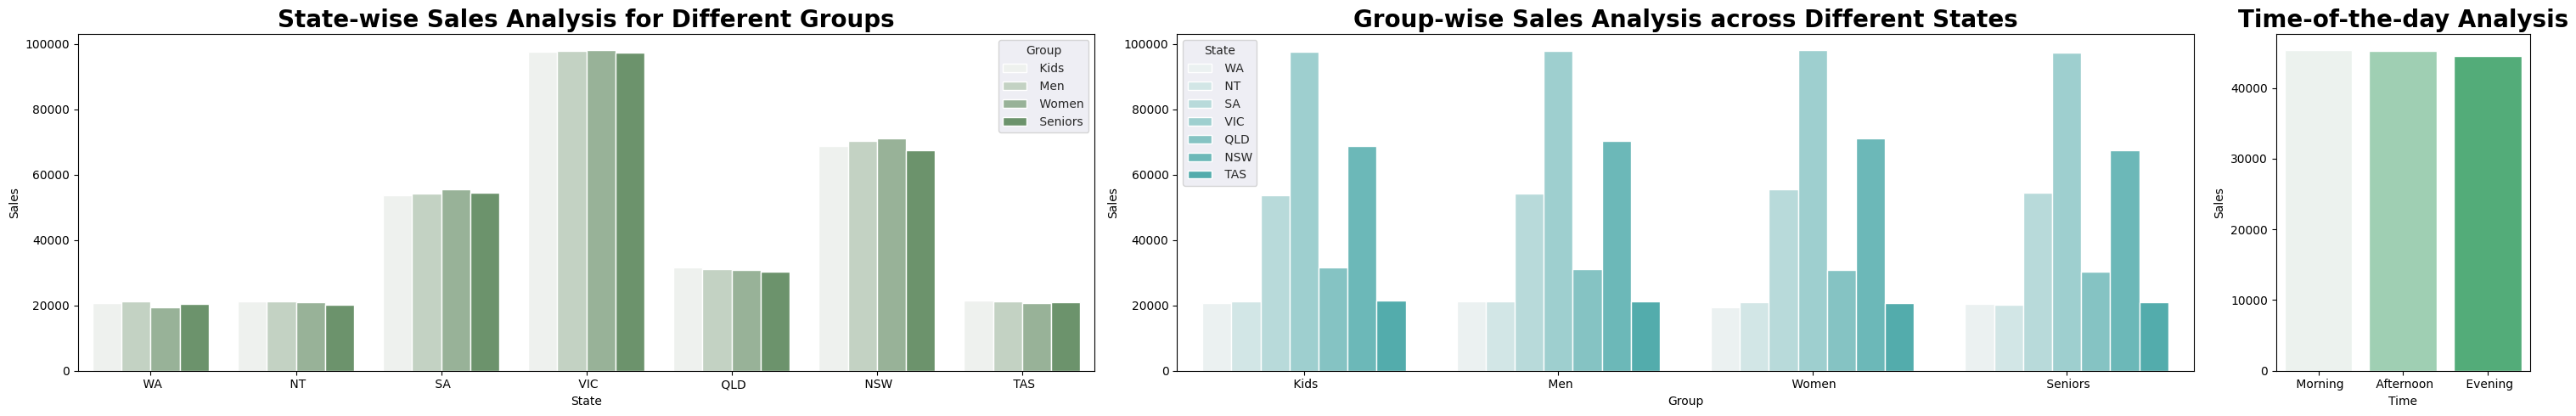

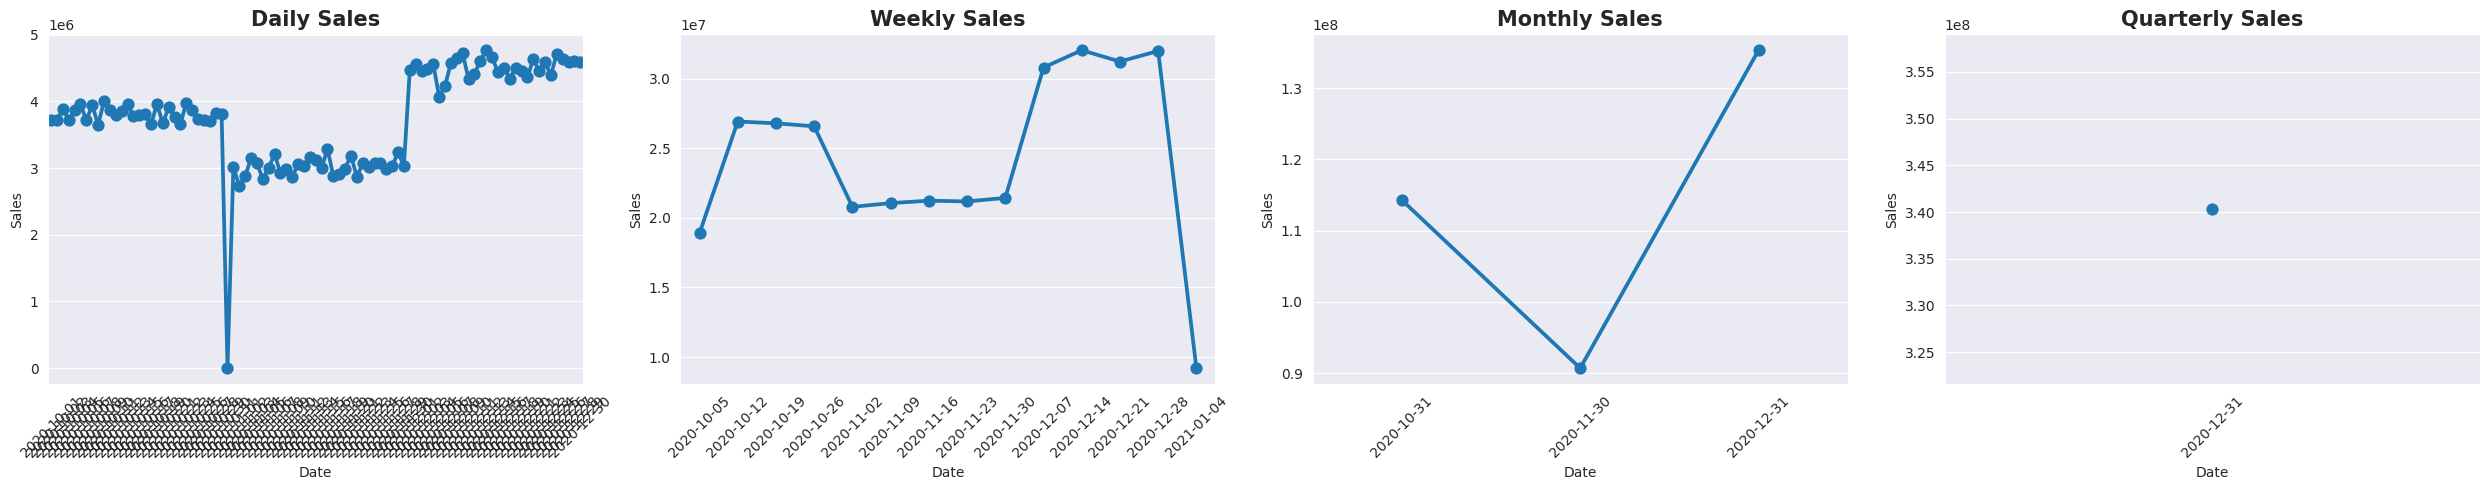

In [ ]:
f0, axes0 = plt.subplots(1, 3, figsize = (30, 5), gridspec_kw={'width_ratios':[4,4,1]})
sns.set_style("darkgrid")

fig1 = sns.barplot(x='State', y='Sales', data=df, hue='Group', palette='light:#696', errorbar=None, ax = axes0[0])
axes0[0].set_title('State-wise Sales Analysis for Different Groups', fontweight='bold', fontsize = 20)

fig2 = sns.barplot(x='Group', y='Sales', data=df, hue='State', palette='light:#4BB', errorbar=None, ax = axes0[1])
axes0[1].set_title('Group-wise Sales Analysis across Different States', fontweight='bold', fontsize = 20)

fig2 = sns.barplot(x='Time', y='Sales', data=df, palette='light:#4B7', errorbar=None, ax = axes0[2])
axes0[2].set_title('Time-of-the-day Analysis', fontweight='bold', fontsize = 20)

f0.tight_layout()
plt.show()

f2, axes2 = plt.subplots(1, 4, figsize = (25, 5))
sns.set_style("darkgrid")

daily_report = df.resample('D').sum(numeric_only = True)
fig4 = sns.pointplot(x='Date', y='Sales', data=daily_report, errorbar=None, ax = axes2[0])
axes2[0].set_title('Daily Sales', fontweight='bold', fontsize = 15)
axes2[0].set_xticklabels(daily_report.index.date, rotation=45)

fig5 = sns.pointplot(x='Date', y='Sales', data=weekly_report, errorbar=None, ax = axes2[1])
axes2[1].set_title('Weekly Sales', fontweight='bold', fontsize = 15)
axes2[1].set_xticklabels(weekly_report.index.date, rotation=45)

fig6 = sns.pointplot(x='Date', y='Sales', data=monthly_report, errorbar=None, ax = axes2[2])
axes2[2].set_title('Monthly Sales', fontweight='bold', fontsize = 15)
axes2[2].set_xticklabels(monthly_report.index.date, rotation=45)

fig7 = sns.pointplot(x='Date', y='Sales', data=quarterly_report, errorbar=None, ax = axes2[3])
axes2[3].set_title('Quarterly Sales', fontweight='bold', fontsize = 15)
axes2[3].set_xticklabels(quarterly_report.index.date, rotation=45)

f2.tight_layout()
plt.show()


Barplots are used to represent the below as they are the best to differentiate between different categories
- State-wise sales analysis for different groups (kids, women, men, and seniors)
- Group-wise sales analysis (kids, women, men, and seniors) across different states
- Time-of-the-day analysis

Lineplots are used to generate daily, weekly, monthly and quarterly sales charts as they represent the trends properly.

#Report

Conclusions from the above analysis:
- State-wise sales analysis for different groups shows that the state VIC and WA have highest and lowest sales respectively irrespective of the Group (Kids, Men, Women, Seniors). Group does not affect the state-wise sales.
- Group-wise sales analysis across different states shows that it follows the same trend in all the states irrespective of the group.
- Time-of-the-day analysis shows Morning time sales are the slightly highest and Evening time sales are the slightly lowest. But there is no much difference.
